#  Sentiment Analysis

##  Level1 - Project 4 - Dataset1: [Link](https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset)

### Name: Priyanshu Priya
### Data Analytics Internship @OASIS INFOBYTE
### ID: OIB/J1/IP4664

# Task Description:
The primary goal is to develop a sentiment analysis model that can accurately classify the
sentiment of text data, providing valuable insights into public opinion, customer feedback, and
social media trends.

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Understanding

In [2]:
df = pd.read_csv(r"Twitter_Data.csv")
df.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [4]:
df.shape

(162980, 2)

In [5]:
df.describe()

category
count  162973.000000
mean        0.225436
std         0.781279
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000

### <b> Checking for missing values

In [6]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [7]:
# Drop rows with missing values in clean_text and category columns
df.dropna(subset=['clean_text', 'category'], inplace=True)

In [8]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [9]:
# Function to clean text data
import re 

def clean_text(text):
    text = text.lower()                             # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)             # Remove punctuation
    text = re.sub(r'\d+', '', text)                 # Remove numbers
    return text

In [10]:
# Apply the cleaning function
df['clean_text'] = df['clean_text'].apply(clean_text)

In [11]:
df['category'].unique()

array([-1.,  0.,  1.])

In [12]:
# Map numeric categories to sentiment labels

category_map = {-1: 'negative', 0: 'neutral', 1: 'positive'}
df['sentiment'] = df['category'].map(category_map)

## 3. EDA

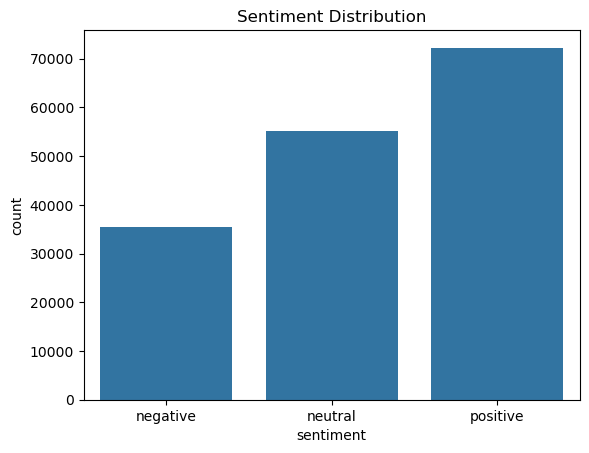

In [13]:
# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

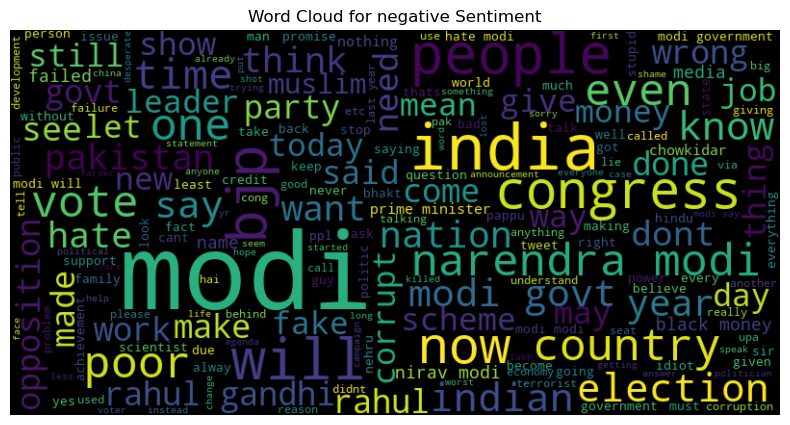

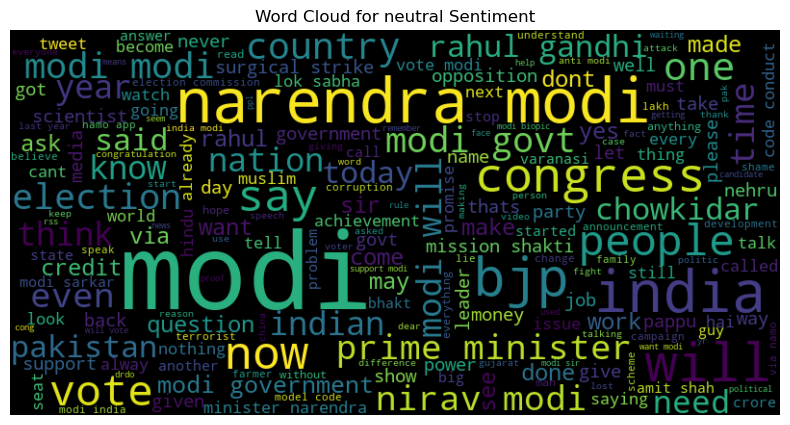

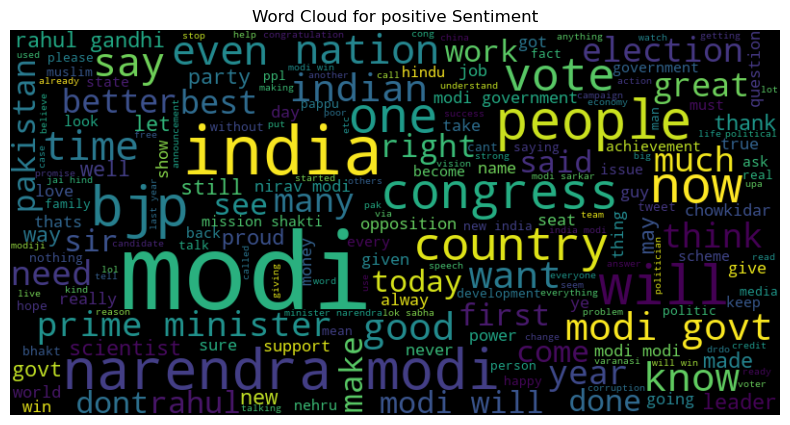

In [15]:
# Generate word clouds for each sentiment category
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

## 4. Feature Engineering

1. Split Data into train and test sets.
2. TF-IDF Vectorization to convert text data into numerical format.

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## 5. Model Building
Training Models Using Naive Bayes and Support Vector Machines as classifiers

In [17]:
# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Train Support Vector Machine model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

## 6. Model Evaluation 
Evaluating Models using accuracy, classification report, and confusion matrix.

Naive Bayes Performance
Accuracy: 0.736546603669387
              precision    recall  f1-score   support

    negative       0.91      0.42      0.57      7152
     neutral       0.88      0.66      0.76     11067
    positive       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



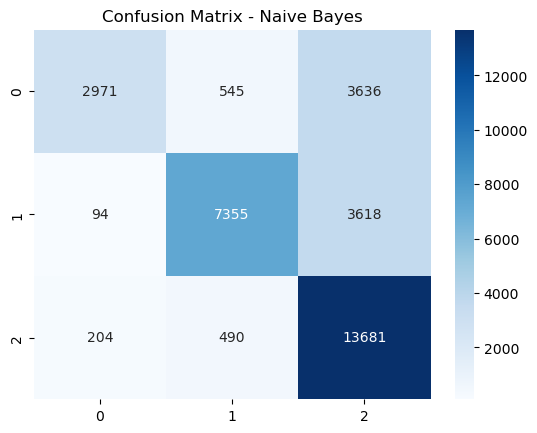

SVM Performance
Accuracy: 0.9389151377554151
              precision    recall  f1-score   support

    negative       0.91      0.86      0.89      7152
     neutral       0.95      0.98      0.96     11067
    positive       0.94      0.95      0.94     14375

    accuracy                           0.94     32594
   macro avg       0.94      0.93      0.93     32594
weighted avg       0.94      0.94      0.94     32594



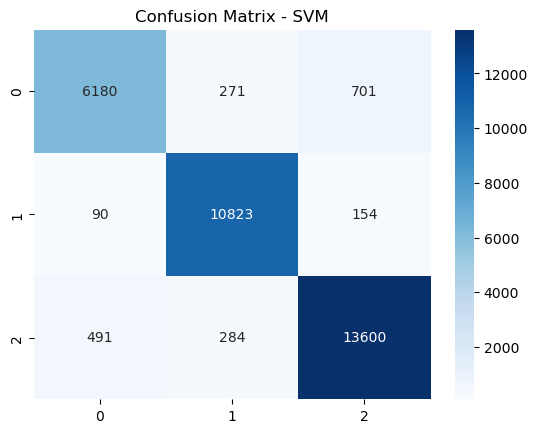

In [18]:
# Naive Bayes evaluation
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# SVM evaluation
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()


# Conclusion:

Twitter Sentiment Analysis provides real-time insights into public opinions by classifying tweets as positive, negative, or neutral. It helps businesses track trends, improve strategies, and enhance customer engagement. While effective at scale, challenges like sarcasm and ambiguous language highlight the need for continuous model refinement.